In [61]:
!pip install ucimlrepo

In [62]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

print("X shape:", X.shape)
print("y shape:", y.shape)
print("\nTarget column:", car_evaluation.metadata.get("target_col"))
print("\nUnique classes:", y.iloc[:, 0].unique())
print("\nClass counts:\n", y.iloc[:, 0].value_counts())

X shape: (1728, 6)
y shape: (1728, 1)

Target column: ['class']

Unique classes: ['unacc' 'acc' 'vgood' 'good']

Class counts:
 class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


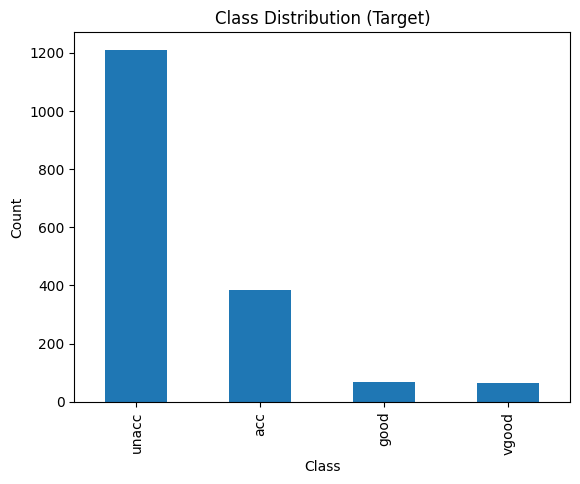

In [63]:
import matplotlib.pyplot as plt
y_col = y.iloc[:, 0]

plt.figure()
y_col.value_counts().plot(kind="bar")
plt.title("Class Distribution (Target)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(X)
print("X after one-hot shape:", X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)

X after one-hot shape: (1728, 21)
X_train shape: (1382, 21)


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.9710982658959537



Decision Tree Classification Report:

              precision    recall  f1-score   support

         acc       0.97      0.90      0.93        77
        good       0.88      1.00      0.93        14
       unacc       0.98      1.00      0.99       242
       vgood       1.00      0.92      0.96        13

    accuracy                           0.97       346
   macro avg       0.96      0.95      0.95       346
weighted avg       0.97      0.97      0.97       346



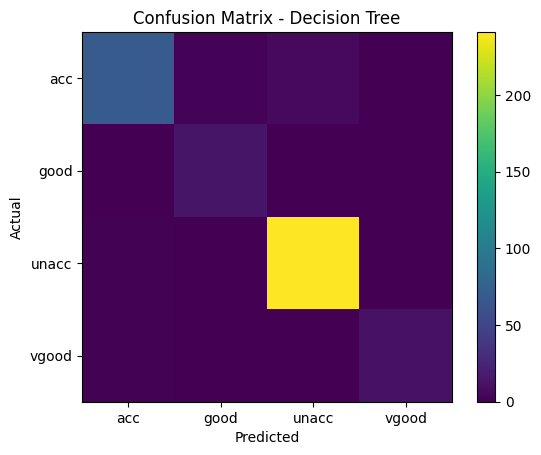

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
print("\nDecision Tree Classification Report:\n")
print(classification_report(Y_test, Y_pred))

cm_dt = confusion_matrix(Y_test, Y_pred)

plt.figure()
plt.imshow(cm_dt)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(range(len(np.unique(y))), np.unique(y))
plt.yticks(range(len(np.unique(y))), np.unique(y))
plt.colorbar()
plt.show()

In [67]:
Y_train = Y_train.values.ravel()

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred2 = rfc.predict(X_test)
accuracy2 = accuracy_score(Y_test, Y_pred2)
print(accuracy2)

0.976878612716763



 Random Forest Classification Report:

              precision    recall  f1-score   support

         acc       0.94      0.97      0.96        77
        good       0.93      0.93      0.93        14
       unacc       0.99      0.99      0.99       242
       vgood       1.00      0.77      0.87        13

    accuracy                           0.98       346
   macro avg       0.96      0.92      0.94       346
weighted avg       0.98      0.98      0.98       346



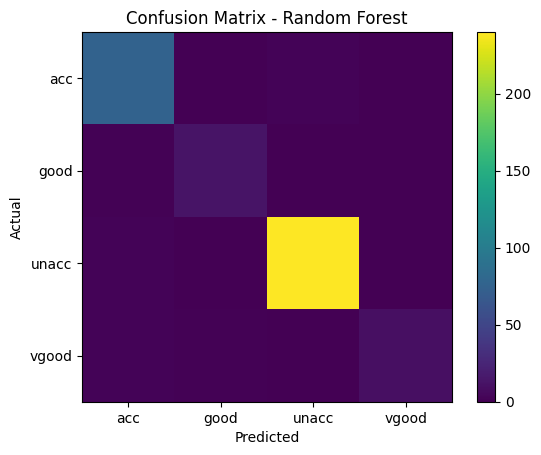

In [69]:
print("\n Random Forest Classification Report:\n")
print(classification_report(Y_test, Y_pred2))

cm_dt2 = confusion_matrix(Y_test, Y_pred2)

plt.figure()
plt.imshow(cm_dt2)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(range(len(np.unique(y))), np.unique(y))
plt.yticks(range(len(np.unique(y))), np.unique(y))
plt.colorbar()
plt.show()

In [70]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class MyRandomForest:
    def __init__(self, n_trees=100, max_depth=None, max_features='sqrt'):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n = X.shape[0]
        indices = np.random.choice(n, n, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        self.trees = []

        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                max_features=self.max_features
            )

            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)

            self.trees.append(tree)

        return self

    def predict_proba(self, X):
        X = np.asarray(X)

        tree_probs = np.array([tree.predict_proba(X) for tree in self.trees])

        return np.mean(tree_probs, axis=0)

    def predict(self, X):
        X = np.asarray(X)

        tree_preds = np.array([tree.predict(X) for tree in self.trees])

        final_preds = []
        for col in tree_preds.T:
            values, counts = np.unique(col, return_counts=True)
            final_preds.append(values[np.argmax(counts)])

        return np.array(final_preds)


In [71]:
rfc2 = MyRandomForest()
rfc2.fit(X_train, Y_train)
Y_pred3 = rfc2.predict(X_test)
accuracy3 = accuracy_score(Y_test, Y_pred3)
print(accuracy3)

0.9855491329479769



MyRandomForest Report:

              precision    recall  f1-score   support

         acc       0.95      0.99      0.97        77
        good       1.00      0.93      0.96        14
       unacc       1.00      0.99      0.99       242
       vgood       1.00      0.92      0.96        13

    accuracy                           0.99       346
   macro avg       0.99      0.96      0.97       346
weighted avg       0.99      0.99      0.99       346



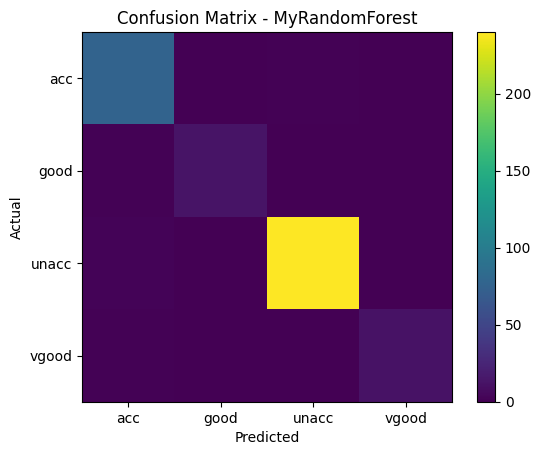

In [72]:
print("\nMyRandomForest Report:\n")
print(classification_report(Y_test, Y_pred3))

cm_my = confusion_matrix(Y_test, Y_pred3)

plt.figure()
plt.imshow(cm_my)
plt.title("Confusion Matrix - MyRandomForest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(range(len(np.unique(y))), np.unique(y))
plt.yticks(range(len(np.unique(y))), np.unique(y))
plt.colorbar()
plt.show()

In [76]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest - sklearn", "MyRandomForest"],
    "Accuracy": [accuracy, accuracy2, accuracy3]
})

print(results)

                     Model  Accuracy
0            Decision Tree  0.971098
1  Random Forest - sklearn  0.976879
2           MyRandomForest  0.985549
